<a href="https://colab.research.google.com/github/MinaPetrovicIVsm/test/blob/main/neuronska_mreza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./sample_data/mnist_train_small.csv")

In [3]:
from sklearn.model_selection import train_test_split
data = data.rename(columns={"6": "label"})
data.head()
print(data.shape)

train, test = train_test_split(data, test_size=0.2)

(19999, 785)


array([[<Axes: title={'center': 'label'}>]], dtype=object)

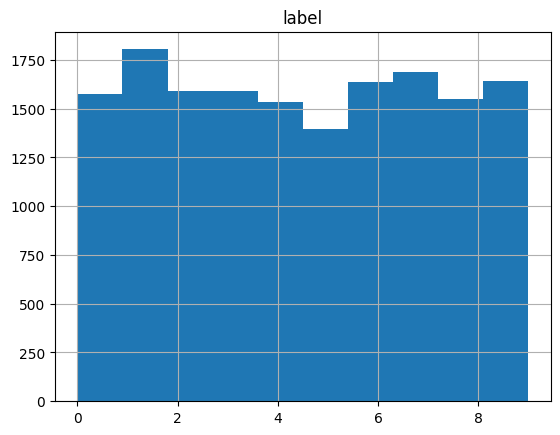

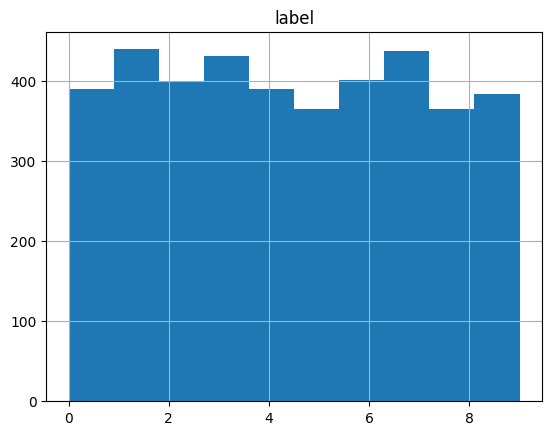

In [4]:
train.hist(column='label')
test.hist(column="label")

In [5]:
train = np.array(train)
test = np.array(test)

train = train.T




y_train = train[0]
X_train = train[1:]
print(X_train.shape)
m = X_train.shape[1]
X_train = X_train / 255
print(y_train)

(784, 15999)
[0 1 9 ... 8 7 1]


In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.001, 100)

Iteration:  0
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.07981748859303707
Iteration:  10
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08069254328395525
Iteration:  20
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08038002375148447
Iteration:  30
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08081755109694357
Iteration:  40
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08125507844240265
Iteration:  50
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.0817551096943559
Iteration:  60
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08269266829176823
Iteration:  70
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08331770735670979
Iteration:  80
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08363022688918058
Iteration:  90
[9 0 0 ... 9 0 9] [0 1 9 ... 8 7 1]
0.08431776986061629
